# Measures of Relationship

## Covariance and Correlation

A <b>correlation</b> analysis outputs a correlation coefficient $r$ (a.k.a. Pearson's correlation coefficient) that shows the linear relationship between two variables, and varies between -1 (a perfectly negative correlation) and +1 (a perfectly positive correlation).

Correlation is <b>covariance</b> scaled by the standard deviation of both data items, and <b>covariance</b> is an unscaled number that measures the linear relationship between two variables (ranging from $-X$ to $+X$).

Let's grab some data and illustrate... we'll use something that is likely correlated - the US GDP and adjusted 'Real GDP' since the year 1990. We'll also start by importing some necessary libraries.

In [8]:
# pip install --user Nasdaq-Data-Link
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nasdaqdatalink

Then grab the data from Nasdaq Link's FRED database

In [ ]:
gdp = nasdaqdatalink.get("FRED/GDP", start_date="1990-01-01")
real_gdp = nasdaqdatalink.get("FRED/GDPC1", start_date="1990-01-01")

In [32]:
gdp.rename(columns = {'Value':'GDP'}, inplace = True)
gdp.head()

,GDP
Date,
1990-01-01,5872.701
1990-04-01,5960.028
1990-07-01,6015.116
1990-10-01,6004.733
1991-01-01,6035.178


In [33]:
real_gdp.rename(columns = {'Value':'Real_GDP'}, inplace = True)
real_gdp.head()

,Real_GDP
Date,
1990-01-01,9364.259
1990-04-01,9398.243
1990-07-01,9404.494
1990-10-01,9318.876
1991-01-01,9275.276


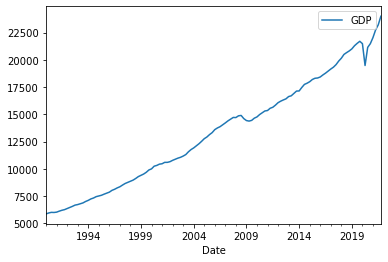

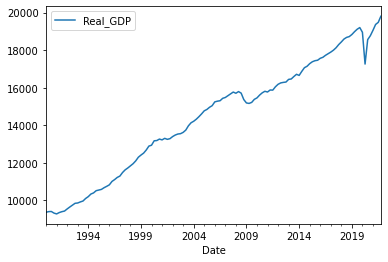

In [34]:
gdp.plot();
real_gdp.plot();

### Covariance

The formula for covariance is as follows:
    
$$cov(x,y)=\frac{\sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})}{N-1}$$

An implementation of this exists in Numpy. It returns a matrix, comparing each variable to each other variable.

In [36]:
gdp_vals = gdp['GDP'].values
real_gdp_vals = real_gdp['Real_GDP'].values
np.cov(gdp_vals, real_gdp_vals)

array([[24687690.14732611, 14930035.73104249],
       [14930035.73104249,  9225461.9170903 ]])

You can see that the numbers returned are not normalized, and would not be very helpful in comparing the relationship between these variables to the relationships in other datasets. Nor would it make for an easy way to express to others the relationship between our two variables.

### Correlation

<b>Correlation</b> is calculated as follows:
    
$$r = \frac{N\times \sum{XY}-(\sum{X}\sum{Y})}{\sqrt{ [N\sum{x^2}-(\sum{x})^2 ][N \sum{y^2}-(\sum{y})^2 }]}\$$

Again, we don't have to calculate it manually because a reliable implementation exists in Numpy.

In [38]:
np.corrcoef(gdp_vals, real_gdp_vals)

array([[1.        , 0.98929669],
       [0.98929669, 1.        ]])

Again, we are returned a matrix. The numbers on the left diagonal are equal to 1 because those cells represent a variable being compared against it itself.

### Coefficient of Determination

The <b>Coefficient of Determination</b>, $R^2$, is heavily used in forecasting and modeling, and is a function of the mean squared error that a model is able to eliminate. Squaring the error results in it always being positive, and taking errors of a negative direction into account when there are multiple input variables.

$$R^2 - 1 - \frac{SS_{res}}{SS_{tot}}$$

An implementation exists in scikit-learn.

In [42]:
from sklearn.metrics import r2_score
R2 = r2_score(gdp_vals, real_gdp_vals)
print(R2)

0.7838068160974643


### Adjusted $R^2$

THe adjusted $R^2$ metric takes into account the number of parameters in a model, so it's preferable when comparing models of differing numbers of variables. It is calculated as follows:

$$Adj.R^2 = 1 - \frac{n - 1}{n - k - 1} (1-R^2)$$ 

And therefore can be calculated quite easily from the $R^2$ we obtained.

In [45]:
n = len(gdp_vals)
p = 2
Adj_R2 = 1-(1-R2)*(n-1)/(n-p-1)
print(Adj_R2)

0.7803477251550237


This will be more important when we start analyzing more complex problems.

## Non-Parametric Measures of Relationship

Like linear regression, the correlation coefficient assumes data normality (that the data comes from a Gaussian-like distribution) and linearity. What if these assumptions aren't met?

Similar to with hypothesis testing, there are non-parametric methods which carry less 'power', but relax certain assumptions.

### Spearman Correlation

<b>Spearman Correlation</b> is a non-parametric alternative to Pearson correlation, since Pearson's $r$ is sensitive to outliers, and inflates or deflates nonlinear relationships. Pearson and Spearman correlation converge when the data are normally distributed. Also referred to as Spearman's $\rho$ (rho), it tests for a monotonic relationship; i.e., a relationship of increasing or decreasing numbers, regardless of the spacing between.

To Compute Spearman Correlation:
    <ol>
        <li>Transform both variables' values to ranks</li>
        <li>Compute the Pearson correlation coefficient on the rank-transformed data</li>
        <li>Compute p-value as you would with the Pearson correlation</li>
    </ol>

$$t_{n-2} = \frac{ r \sqrt{n-2} }{ 1 - r^2 }$$

We'll use an implementation from the Scipy module. It returns an object with a correlation value and a p-value for the correlation statistic

In [56]:
import scipy.stats as stats
spearm_result = stats.spearmanr(gdp_vals, real_gdp_vals)
spearm_result

SpearmanrResult(correlation=0.9983462277971068, pvalue=3.612645247238005e-158)

If we only want to see the first value returned, we can select it with [0].

In [57]:
spearm_result[0]

0.9983462277971068

In [58]:
spearm_corr_only = stats.spearmanr(gdp_vals, real_gdp_vals)[0]
spearm_corr_only

0.9983462277971068

### Kendall's Correlation

Kendall's correlation (a.k.a. Kendall's tau) is used for ordinal data (e.g., the likert scale), that has no fixed relationship across the levels. It transforms the data to rank concordances.

$$\tau = K^{-1} \sum sgn(\tilde{x}_i - \tilde{x}_i:) sgn(\tilde{y}_i - \tilde{y}_i:)$$

In [62]:
kendall_result = stats.kendalltau(gdp_vals, real_gdp_vals)
kendall_result

KendalltauResult(correlation=0.9812992125984253, pvalue=1.1985023589587789e-60)

In [63]:
kendall_result[0]

0.9812992125984253

In [65]:
kendall_corr_only = stats.kendalltau(gdp_vals, real_gdp_vals)[0]
kendall_corr_only

0.9812992125984253